<a href="https://colab.research.google.com/github/urvi-creator/-MallCustomers-Clustering/blob/main/mall_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df= pd.read_csv("Mall_Customers.csv")

Q2. After appropriately cleaning the data, carry out Exploratory Data Analysis
processes to retrieve at least 3 insights/observations from the dataset.

In [ ]:
#Datacleaning code
print("Dataset Shape", df.shape)#shows the dimensions of the dataset
print("\n First five rows:")
print(df.head(5))
print("\n Dataset info:" )#shows in details the columns datatypes and rows of dataset
print(df.info())
print("\n Missing values") #identifies the null values if any
print(df.isnull().sum())
original_df = df.copy()
#check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
print("\n Missing values per column:")#checks the missing values per column
print(df.isna().sum())
print("\n statistical summary:")
print(df.describe())
df.drop('CustomerID', axis=1, inplace=True) #This removes the column of CustomerID so as to ensure that clustering is done well

In [ ]:
#The Exploratory Data Analysis
# Insight 1-> Create income categories and show exact counts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy
plt.figure(figsize=(15, 5)) # creates a blank canvas that is wide enough to occuppy two charts

# Income categories where by each customers income or annual income is placed into categories like 0 to 30k
plt.subplot(1, 2, 1)
income_bins = [0, 30, 60, 90, 120, 150]# income ranges
income_labels = ['0-30k', '30-60k', '60-90k', '90-120k', '120k+']#labels for income ranges
df['Income_Category'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)#converts the numerical income into categories

income_counts = df['Income_Category'].value_counts().sort_index()#counts the customers in each category
#creates the bar graph with the x and y labels with the x axis as the annual income and y axis as the index or number of customers
bars = plt.bar(income_counts.index, income_counts.values)
plt.title('Number of Customers by Income Category')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')

# Add exact numbers on bars ie loops through each bar and puts the exact number above it
for bar, count in zip(bars, income_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom')

# Insight 2-> Spending score categories
plt.subplot(1, 2, 2)
spending_bins = [0, 20, 40, 60, 80, 100]# spending score ranges
spending_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']# labels for the spending score ranges
df['Spending_Category'] = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels)
#converts the numerical spending scores into categories

spending_counts = df['Spending_Category'].value_counts().sort_index()#counts the number of customers in each category
#creates the bar graph with orange bars with the x and y labels
#with the x axis as the spending score categories  and y axis as the index or number of customers
bars = plt.bar(spending_counts.index, spending_counts.values, color='orange')
plt.title('Number of Customers by Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')

# Add exact numbers on bars ie loops through each bar and puts the exact number above it
for bar, count in zip(bars, spending_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Insight 3: Gender distribution and spending patterns
plt.figure(figsize=(12, 4))#creates a blank canvas that is wide enough to occuppy two charts


# Left bar graph: Gender distribution
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()#counts the number of customers in the gender column
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'lightblue'])
#plots the graph with the number of customers in gender column that is the index on y axis and the gender values of male and female on x axis
#with bars for males in lightblue and female in pink
plt.title('Gender Distribution')
plt.ylabel('Number of Customers')

# Add exact numbers on bars  ie loops through each bar and puts the exact number above it
for bar, count in zip(bars, gender_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom')

# Right bar graph: Average spending score by gender
plt.subplot(1, 2, 2)
avg_spending = df.groupby('Gender')['Spending Score (1-100)'].mean()# groups all customers by gender
#and calculates the average spending score of each gender
bars = plt.bar(avg_spending.index, avg_spending.values,
               color=['pink', 'lightblue'], alpha=0.7)#plots the indices of gender male and female on x axis
               # and the heights of the bar ie the average scores per gender
plt.title('Average Spending Score by Gender')#title of the bar graph
plt.ylabel('Average Spending Score')

# Add exact values on bars ie loops through each bar and puts the exact number above it
for bar, value in zip(bars, avg_spending.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**INSIGHT 1** Who shops here? This insight is about Income distribution analysis it shows the distribution of customers across different income brackets From the graph generated, most customers are of upper- middle class income of a range 60-90k, few luxury customers of above 120k,low income customers of range 0 to 30k, middle class from 30 to 60k and upper income from 90 to 120k.From the output the mall attracts a high number of 86 customers in the upper- middle class category. Meaning the mall can focus on premium but accessible brands and should introduce discounts for lower income customers. the mall can also introduce premiumum loyalty programe with exclusive benefits.

**INSIGHT 2** How do they shop? This insight shows the spending score categories or the spending behaviour categories. it shows how freely customers spend regardless of income and distribution of spending habits across all cuatomers.of which we have 75 customers in the 40 to 60 spending range meaning this is the core customer base of the mall since they are consistent and relaible spenders hence the mall can focus on mid range products that appeal to the 40 to 60 spending range. then it can also feature products in the $30-90 price range. then they can have loyalty programs and mid-week shopping events for consistent shoppers. In otherwords the mall should cater heavily on the 40 to 60 spending segment but shouldnt ignore the high spenders as they bring in more revenue or premium revenue. it should also clear pathways for low spenders

**INSIGHT 3** This insight is about gender distributions and spending patterns. So it show that females spend more with an average of 51.5 spending score while men spend slitghtly less than the women with an average of 48.5 spending score. In this case the mall can have more stores for like cosmetics, clothes etc that appeal to females. it could also create promotions to increase male spending like having sports bar specials, grooming and gaming nights etec

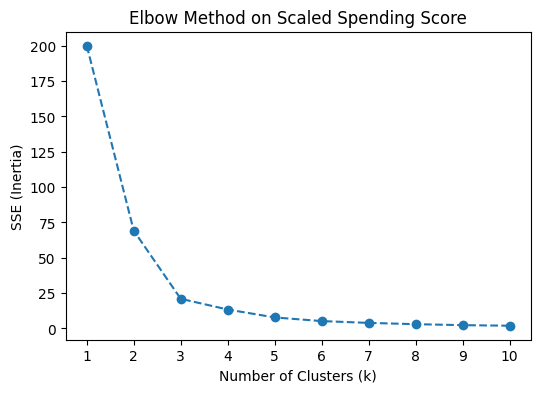

Silhouette Scores for Spending Score (1 Feature):
k=2: 0.5352
k=3: 0.6540
k=4: 0.6013
k=5: 0.6100
k=6: 0.6063
k=7: 0.5952
k=8: 0.6060
k=9: 0.5881
k=10: 0.6027


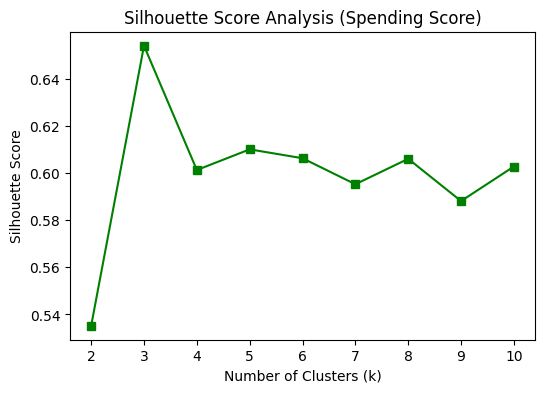

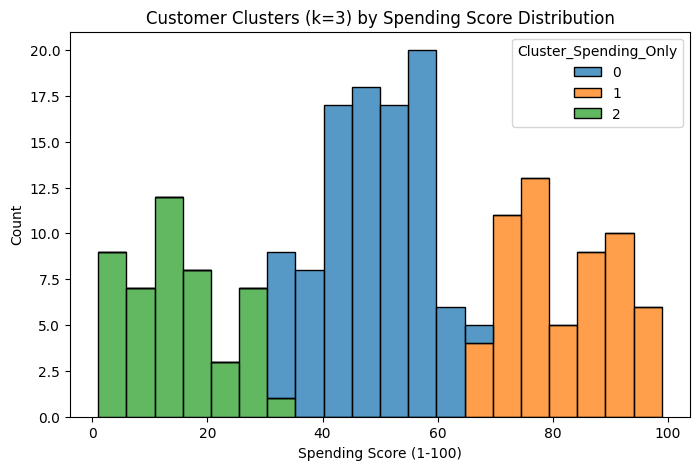

In [ ]:
# Question 3a — K-Means Clustering using a Single Feature (Spending Score)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select the single feature for clustering
X1 = df[['Spending Score (1-100)']]

#  Scale the feature (normalize values)
scaler_1f = StandardScaler()
X1_scaled = scaler_1f.fit_transform(X1)

#  Set K-Means parameters
kmeans_kwargs_1f = {
    "init": "random",
    "n_init": 10,
    "random_state": 42
}

#  Elbow Method (SSE)
sse_1f = []
for k in range(1, 11):
    kmeans_1f = KMeans(n_clusters=k, **kmeans_kwargs_1f)
    kmeans_1f.fit(X1_scaled)
    sse_1f.append(kmeans_1f.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse_1f, marker='o', linestyle='--')
plt.title('Elbow Method on Scaled Spending Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.xticks(range(1, 11))
plt.show()

#  Silhouette Score Verification
sil_scores_1f = []
print("Silhouette Scores for Spending Score (1 Feature):")
for k in range(2, 11):
    kmeans_1f = KMeans(n_clusters=k, **kmeans_kwargs_1f)
    labels = kmeans_1f.fit_predict(X1_scaled)
    score = silhouette_score(X1_scaled, labels)
    sil_scores_1f.append(score)
    print(f"k={k}: {score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores_1f, marker='s', color='green')
plt.title('Silhouette Score Analysis (Spending Score)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

# Apply K-Means with k=3
optimal_k_1f = 3
kmeans_final_1f = KMeans(n_clusters=optimal_k_1f, **kmeans_kwargs_1f)
df["Cluster_Spending_Only"] = kmeans_final_1f.fit_predict(X1_scaled)

#  Visualize the Clusters
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="Spending Score (1-100)",
    hue="Cluster_Spending_Only",
    palette="tab10",
    bins=20,
    multiple="stack"
)
plt.title(f"Customer Clusters (k={optimal_k_1f}) by Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.show()


Question 3b
 Use the k-means algorithm to create groups of customers based on:
 2 suitable features. Elbow Method with visualization

In [ ]:
#Question 3b code (with unified random_state=42)

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Select only numeric columns for Kmeans
numeric_df = df.select_dtypes(include=['number'])


# Create a separate scaled array for the 2-Feature plot (Income vs. Spending)
income_spending_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler_plot = StandardScaler()
scaled_plot_data = scaler_plot.fit_transform(income_spending_df)

# 2. Scale all numeric columns (for the main clustering)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

# Initialize K-Means parameters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 42, # UNIFIED random_state
}

# Elbow Method
# Store the sum of squared errors (SSE) for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot results with elbow method
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(scaled_df)
df['Cluster']=kmeans.labels_

In [ ]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)
# eg 0 cluster high income high spending score - implusive buyers and brand enthusiasts
# 1 cluster high income low spenders
#2 cluster low income low spenders
# 3 cluster - moderate income average spenders
# 4 cluster - moderate income high spenders


In [ ]:
# This is to visualize the clusters clearly
plt.scatter(
    scaled_plot_data[:, 0], # X-axis: Annual Income (scaled)
    scaled_plot_data[:, 1], # Y-axis: Spending Score (scaled)
    c=df['Cluster'],
    cmap='viridis'
)
plt.title('Customer Segments (Income vs. Spending)')
plt.xlabel('Annual Income (k$) (scaled)')
plt.ylabel('Spending Score (1-100) (scaled)')
plt.show()

In [ ]:
# This code shows a new column added called Cluster Label that shows diiferent clusters earn a certain amount of income and how they spend it
cluster_labels = {
    0: 'high Income - High Spenders',
    1: 'high Income - Low Spenders',
    2: 'low Income - AverageSpenders',
    3: 'Moderate  Income - Average Spenders',
    4: 'low Income - High Spenders'
}

df['Cluster Label'] = df['Cluster'].map(cluster_labels)
df


3b Silhouette

In [ ]:
from sklearn.metrics import silhouette_score
# This is the computation for the silhouette Score
#for different values of K
silhouette_scores = []

for k in range(2, 11):
    # This now uses the unified random_state=42 implicitly via kmeans_kwargs
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score = {score:.4f}")
# CODE  to visulaize Silhouette Scores
# the higher the silhouette score (closer to 1)
# the better the cluster separation rh k=5
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#Visualize Final Clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df['Cluster'], cmap='rainbow')
plt.title('Final Clusters (K-Means, Verified by Silhouette Score)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [ ]:
# show final cluster means
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

Question 4 Type Question here

In [ ]:
import matplotlib.pyplot as plt

# Reload dataset (make sure Mall_Customers.csv is still uploaded)
df = pd.read_csv("Mall_Customers.csv")

# If your previous code created 'Cluster' column, recreate it quickly
from sklearn.cluster import KMeans
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X2)

# Now run the comparison plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['Spending Score (1-100)'], [0]*len(df),
                c='purple', s=50)
axes[0].set_title('1D Clustering: Spending Score')
axes[0].set_xlabel('Spending Score (1–100)')
axes[0].set_yticks([])

axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                c=df['Cluster'], cmap='rainbow', s=50)
axes[1].set_title('2D Clustering: Income vs Spending Score')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1–100)')

plt.tight_layout()
plt.show()

print("""
Q4 Comparison Summary:
- 1D clustering groups customers based only on spending score (low, medium, high spenders).
- 2D clustering uses both income and spending score to reveal 5 distinct behavioral segments.
- 2D clustering provides deeper insights, e.g., high-income low spenders or low-income high spenders.
- Therefore, 2D clustering is more effective for business decision-making.
""")

Q5 Using a case example of a mall segmenting customers for customer engagement,
use the clustering done in 3b to suggest appropriate ways by which mall
management can interact with their customers

Based on the clusttering done in 3b. there are 5 distinct clusters indentified. The clusters are determined by the cutomer's income level compared to their speninding pattern.
The following are the customer groups identified as well as the appropriate engagement strategies that could be used for ech customer group:
1. High Income - High spenders
These are most likely buyers that enjoy luxury and brand experience often affluent with them.
Ways of engagement:
- Invitation to VIP events with exclusive brand product launches.
- Offeirng them shopping assistance like concierge services.
- Givivng luxury loyalty premium rewards such as airport lounge passes and gym passes.
- Assortment of brand collaborations and limited edition products to sustain their excitemnt and retain them as customers.

2. High Income - Low spenders
These are most likely buyers that have the money but deliberate their purchases based on the value.
ways of engangement:
- Send personalized discounts on quality items and new arrivals.
- Giving product education sessions such as wine tasting and technology demos.
- Providing memebership benefits such as free parking and priority access.

3. Low Income - Average spenders
These are price sensitive customers mostly. They focus on the essentials and occasional wants.
Ways of engagment:
- Running budget friendly promotions such as buy 1 get 1 fee or Terrific Tuesdays.
- Encourage mall visits with entertainment offers and community events
- Use of SMS deals for affodability focus of the customers.

4. Moderate Income - Average spenders
These are customers that are value conscious but open to variety or good experiences.
Ways of engagement:
- Promoting mall rewards programs across the mall such as cashback of purchase vouchers.
- Organizing weekend fairs and movie nights with family packages.
- Encouraging cross-store bundles like shopping plus dining plus a movie.

5. Low Income - High spenders
These customers mostlt spend beyond their means to show status or for enjoyment.
Ways of engagement:
- Offering store credit programs and intallment purchase as options for payment.
- Use of social media influencer marketing to appeal to them as a trend.
- Introduction of loyalty apps that reward frequent shopping.
- Promote affordable luxury products that would still be in their price range to retain their engagement.

Cluster 1,4 and 5 are the most responsive to promotions hence allocate marketing targeting them.

To ensure customer retention we target clusters 2 and 4 as they are steady and long-term potential cutomers based on their spending compared to income level.

Being a mall it would be a more beneficial if the clustering is redone probably every quarter to ensure they keeping up to trend and capturing seasonal and behavioral shifts.
